# Actividad 05 - ADALINE como filtro

**Centro Universitario de Ciencias Exactas e Ingenierías**\
**Materia** Inteligencia artificial 2\
**Nombre:** Mejia Blanco Erick\
**Código:** 211408613

### Descripcion:

Codifica el algoritmo del ADALINE para ser utilizado como filtro.
En esta actividad tendrán dos opciones: Filtrar una señal con ruido (“DataSet2.csv”) o filtrar una señal de audio (usando el script “Adaline_Filtro_de_audio.m”).

Para ambos casos:
1. Al ser un filtro el ADALINE debe de inicializarse en cero, es decir:

w = zeros(2*p, 1);
b = 0;

donde p es el número de retardos (tanto a la señal como a la predicción)

2. Filtra la señal encontrando un parámetro apropiado para p y para el factor de aprendizaje
3. Grafica la señal con ruido y la señal filtrada de manera superpuesta
4. Concluye que experiencia te dejo este trabajo.


### Instalando dependencias para manipulacion de audio

In [ ]:
!conda install cffi -y

In [ ]:
!pip install pysoundfile

In [ ]:
!pip install librosa

### Importacion de librerias necesarias

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import librosa
import IPython.display as ipd

### Carga del archivo de audio

In [2]:
data, sample_rate = librosa.load('Hallelujah-sound-effect.mp3')
data

array([-8.519121e-08,  8.425059e-08, -7.918575e-08, ...,  0.000000e+00,
        0.000000e+00,  0.000000e+00], dtype=float32)

In [3]:
sample_rate

22050

### Audio original

In [4]:
ipd.Audio(data, rate=sample_rate)

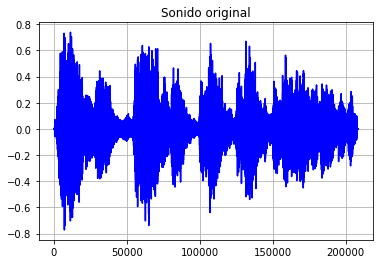

In [5]:
plt.grid()
plt.title('Sonido original')
plt.plot(data, '-b')
plt.show()

### Agregado de ruido gaussiano al audio

In [6]:
noise = 0.5
noise

0.5

In [7]:
samples, = data.shape
samples

208512

In [8]:
dim = 1
dim

1

In [9]:
data_noise = data + noise * ( - 0.5 + np.random.rand(samples))
data_noise

array([ 0.03283005, -0.00786507, -0.0478501 , ..., -0.06593391,
        0.16468665, -0.22586578])

In [10]:
ipd.Audio(data_noise, rate=sample_rate)

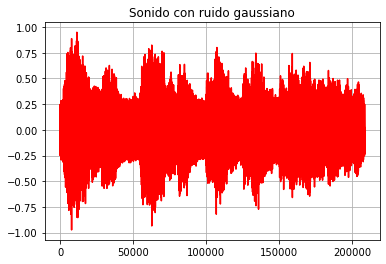

In [11]:
plt.grid()
plt.title('Sonido con ruido gaussiano')
plt.plot(data_noise, '-r')
plt.show()

In [12]:
# Retardos por filtro
p = 3
p

3

In [13]:
w = np.zeros([2, dim])
w

array([[0.],
       [0.]])

In [14]:
b = 0
b

0

In [15]:
eta = 0.00005
eta

5e-05

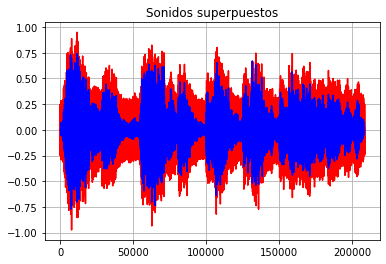

In [16]:
plt.grid()
plt.title('Sonidos superpuestos')
plt.plot(data_noise, '-r', label='noise')
plt.plot(data, '-b', label='data')
plt.show()

### Preparado de los datos

In [17]:
x = data.reshape(samples, dim)
x

array([[-8.519121e-08],
       [ 8.425059e-08],
       [-7.918575e-08],
       ...,
       [ 0.000000e+00],
       [ 0.000000e+00],
       [ 0.000000e+00]], dtype=float32)

In [18]:
y = 3 * np.cos(x) - 2 + np.sin(2*x+0.5) + np.cos(4*x-0.2) + 9
y

array([[11.459492],
       [11.459492],
       [11.459492],
       ...,
       [11.459492],
       [11.459492],
       [11.459492]], dtype=float32)

In [19]:
z = data_noise.reshape(samples, dim)
z

array([[ 0.03283005],
       [-0.00786507],
       [-0.0478501 ],
       ...,
       [-0.06593391],
       [ 0.16468665],
       [-0.22586578]])

In [20]:
X = np.array([np.ones([samples, dim]) ,x])
X

array([[[ 1.00000000e+00],
        [ 1.00000000e+00],
        [ 1.00000000e+00],
        ...,
        [ 1.00000000e+00],
        [ 1.00000000e+00],
        [ 1.00000000e+00]],

       [[-8.51912105e-08],
        [ 8.42505870e-08],
        [-7.91857531e-08],
        ...,
        [ 0.00000000e+00],
        [ 0.00000000e+00],
        [ 0.00000000e+00]]])

In [21]:
y_hat = np.zeros([samples, dim])
y_hat

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [22]:
y_hat[0:p] = z[0:p]
y_hat

array([[ 0.03283005],
       [-0.00786507],
       [-0.0478501 ],
       ...,
       [ 0.        ],
       [ 0.        ],
       [ 0.        ]])

In [23]:
for j in range(p, samples):
    for k in range(p):
        estimado = w.conj().T @ X[:, j]
        w = w + eta * (z[j, :] - estimado) * X[:,j]
    y_hat[j, 0] = w.conj().T @ X[:, j]

### Audio filtrado

In [24]:
y_hat

array([[ 0.03283005],
       [-0.00786507],
       [-0.0478501 ],
       ...,
       [-0.00051775],
       [-0.00049298],
       [-0.00052678]])

In [25]:
ipd.Audio(y_hat.reshape(samples), rate=sample_rate)

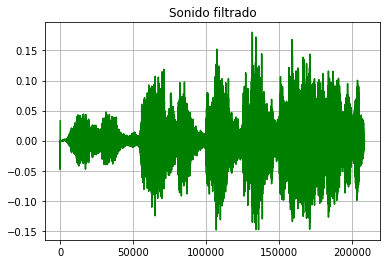

In [26]:
plt.grid()
plt.title('Sonido filtrado')
plt.plot(y_hat, '-g', label='filtered')
plt.show()

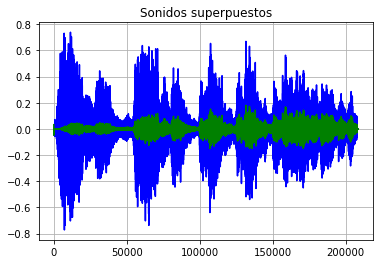

In [27]:
plt.grid()
plt.title('Sonidos superpuestos')
plt.plot(data, '-b', label='data')
plt.plot(y_hat, '-g', label='filtered')
plt.show()

### Conclusion

Es interesante como con predicciones se puede hacer la prediccion para recuperar el estado del audio, pero no solo eso, sino que tambien ayuda con las predicciones de precios.